In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("simulation_data.csv")

In [5]:
result = smf.ols(formula = "(y ~ points)",
                 data = df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.300
Date:                Thu, 23 Apr 2020   Prob (F-statistic):             0.0398
Time:                        11:44:13   Log-Likelihood:                -738.65
No. Observations:                 150   AIC:                             1481.
Df Residuals:                     148   BIC:                             1487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.4501      4.628      6.364      0.0

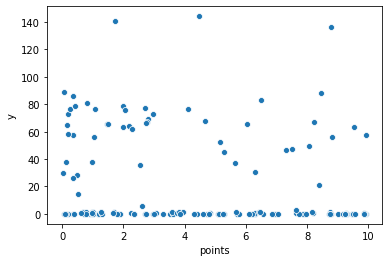

In [27]:
sns.scatterplot("points", "y", data = df)
plt.show()

In [17]:
result = smf.ols(formula = "(y ~ points + out_of_office)",
                 data = df[df["points"].notna()]).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     26.97
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.05e-10
Time:                        17:48:42   Log-Likelihood:                -717.35
No. Observations:                 150   AIC:                             1441.
Df Residuals:                     147   BIC:                             1450.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        38.5754      4.238      9.103

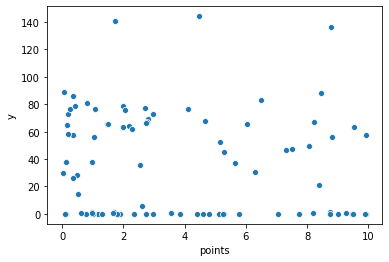

In [31]:
sns.scatterplot("points", "y", data = df[df["out_of_office"] == 0])
plt.show()

In [128]:
res_lm = smf.ols(formula = "(y ~ points + weekly_poll + pre_survey)",
                 data = df[df["points"].notna()]).fit()
print (res_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           9.45e-07
Time:                        17:38:44   Log-Likelihood:                -726.64
No. Observations:                 150   AIC:                             1459.
Df Residuals:                     147   BIC:                             1468.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3427      0.784     -0.437      

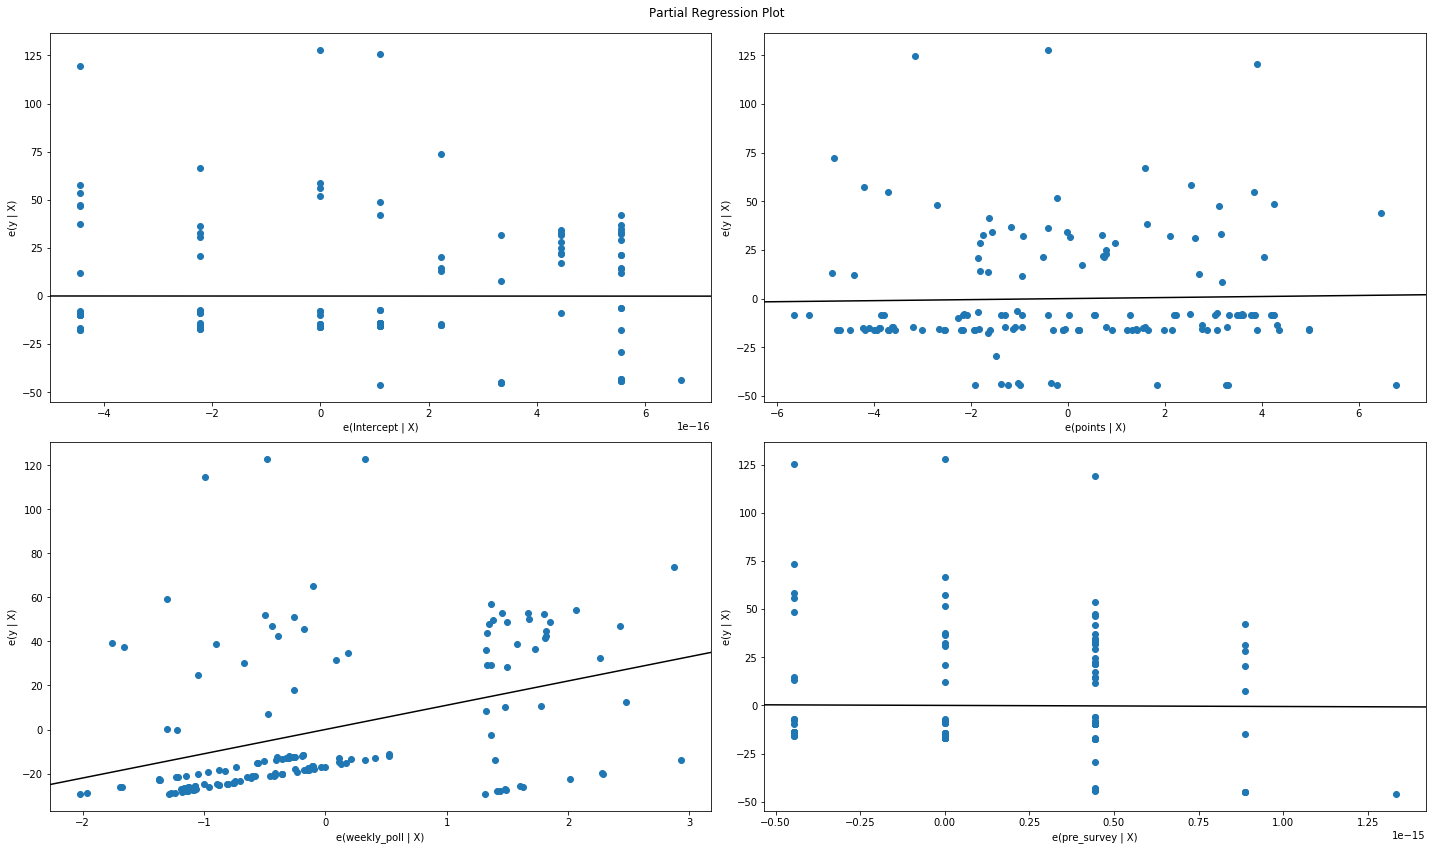

In [41]:
# The partial regression plot shows the relationship between the 
# response and the given explanatory variable after removing the 
# effect of all other explanatory variables in exog.

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

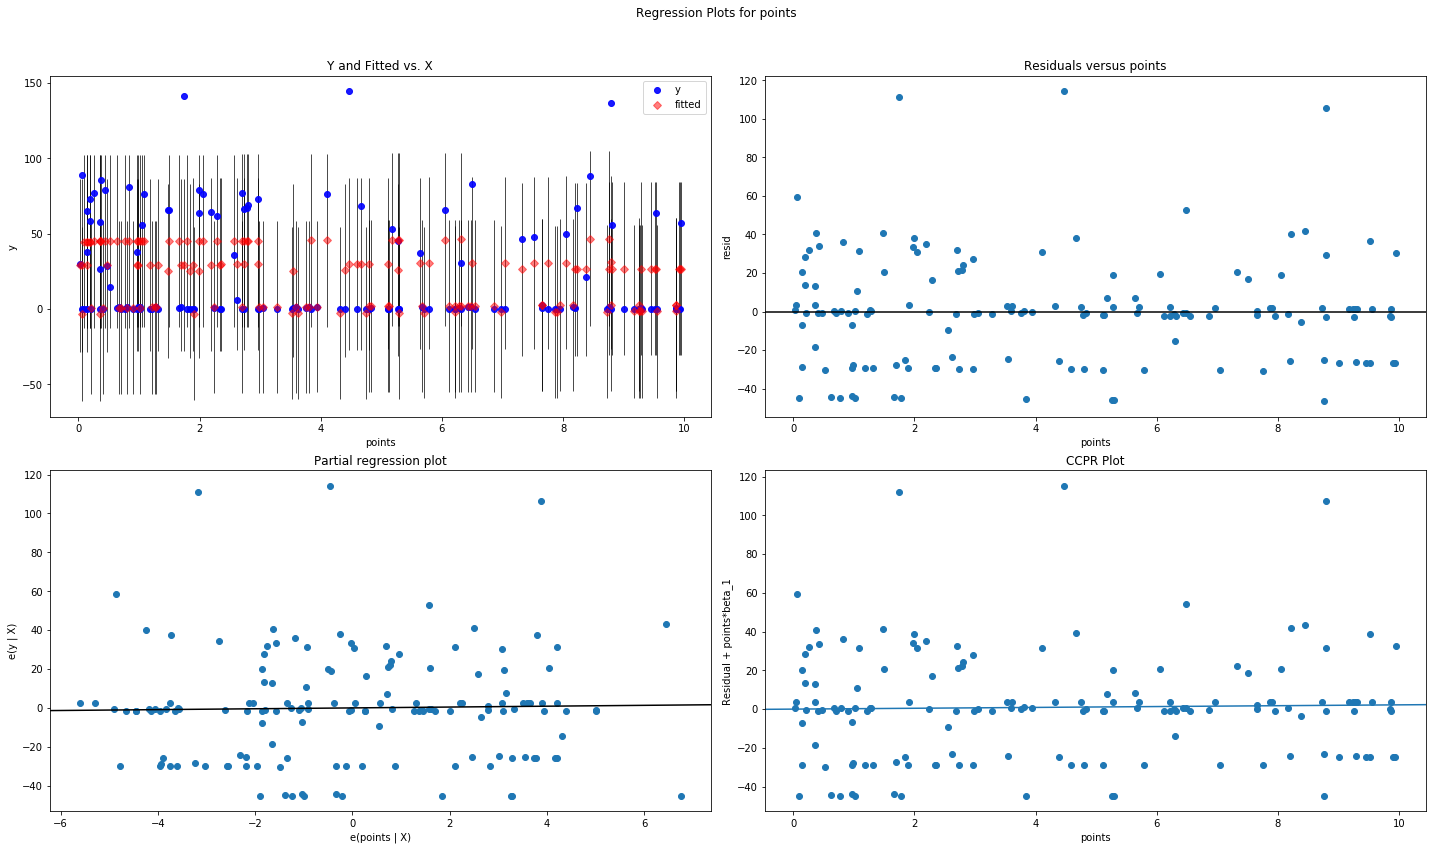

In [39]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_regress_exog(result, "points", fig=fig)

# Autoregressive Work

In [12]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
import numpy as np

In [20]:
df_working_hours = df[df["points"].notna()]

In [23]:
mod = AutoReg(df_working_hours["y"], 1, exog=df_working_hours[["points", "weekly_poll", "pre_survey", "0"]])
res = mod.fit()
res.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                   AutoReg-X(1)   Log Likelihood                -636.538
Method:               Conditional MLE   S.D. of innovations             17.342
Date:                Thu, 23 Apr 2020   AIC                              5.800
Time:                        11:57:13   BIC                              5.941
Sample:                             1   HQIC                             5.858
                                  150                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.5730      0.440      1.303      0.193      -0.289       1.435
y.L1            0.1499      0.047      3.202      0.001       0.058       0.242
points          0.1037      0.501      0.207      0.836      -0.878       1.086
weekly_poll     4.2650      1.314      3.245      0.001       1.689       6.841
pre_survey      1.7133      1.315      1.303      0.193      -0.864       4.291
0              -0.7263      0.044    -16.695      0.000      -0.812      -0.641
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.6709           +0.0000j            6.6709            0.0000
-----------------------------------------------------------------------------
"""

## Prediction

In [36]:
df.head()

,0,y,v_learning,weekly_poll,pre_survey,points,email_indicator,out_of_office,Timestamp
0,0.000000,0.0,0.0,0.95,2.99,NaN,0.0,0.0,2018-09-20 00:00:00
1,0.346667,0.0,0.0,0.95,2.99,NaN,0.0,0.0,2018-09-20 01:00:00
2,0.590000,0.0,0.0,0.95,2.99,NaN,0.0,0.0,2018-09-20 02:00:00
3,0.423333,0.0,0.0,0.95,2.99,NaN,0.0,0.0,2018-09-20 03:00:00
4,0.406667,0.0,0.0,0.95,2.99,NaN,0.0,0.0,2018-09-20 04:00:00


In [37]:
df["Timestamp"] = pd.date_range(start = pd.Timestamp("2018-09-20T00"), freq='H', periods = 360)

In [38]:
df_working_hours = df[df["points"].notna()].reset_index()

In [39]:
df_working_hours_train = df_working_hours.iloc[0:115].reset_index()
df_working_hours_test = df_working_hours.iloc[115:].reset_index()

In [112]:
mod_train = AutoReg(df_working_hours_train["y"], 3, 
                    exog=df_working_hours_train[["points", "weekly_poll", "pre_survey", "0"]])
res = mod_train.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                   AutoReg-X(3)   Log Likelihood                -472.524
Method:               Conditional MLE   S.D. of innovations             16.445
Date:                Thu, 23 Apr 2020   AIC                              5.761
Time:                        12:47:53   BIC                              5.979
Sample:                             3   HQIC                             5.849
                                  115                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1022      0.595      1.853      0.064      -0.063       2.268
y.L1            0.2011      0.056      3.580      0.000       0.091       0.311
y.L2           -0.0192      0.059     -0.325      0.745      -0.135       0.097
y.L3           -0.0630      0.056     -1.119      0.263      -0.173       0.047
points         -0.1695      0.539     -0.314      0.753      -1.227       0.888
weekly_poll     1.6105      2.524      0.638      0.523      -3.336       6.557
pre_survey      3.2956      1.778      1.853      0.064      -0.189       6.781
0              -0.6928      0.048    -14.464      0.000      -0.787      -0.599
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3740           -1.8195j            2.2800           -0.1471
AR.2            1.3740           +1.8195j            2.2800            0.1471
AR.3           -3.0530           -0.0000j            3.0530           -0.5000
-----------------------------------------------------------------------------
"""

In [81]:
int_index_test = pd.Series(range(0, len(df_working_hours_test)))
df_working_hours_test.set_index(int_index_test, inplace=True)

In [84]:
int_index_train = pd.Series(range(0, len(df_working_hours_test)))
df_working_hours_test.set_index(int_index_train, inplace=True)

In [124]:
predictions_0 = res.predict(start = df_working_hours_test.index[0], 
            end = df_working_hours_test.index[len(df_working_hours_test) - 1])

In [125]:
predictions = res.predict(start = df_working_hours_test.index[0], 
            end = df_working_hours_test.index[len(df_working_hours_test) - 1], 
            exog_oos = df_working_hours_test[["points", "weekly_poll", "pre_survey", "0"]],
                         dynamic = True)

In [115]:
%matplotlib inline

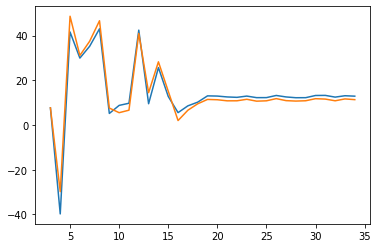

In [117]:
plt.plot(predictions)
plt.plot(predictions_0)

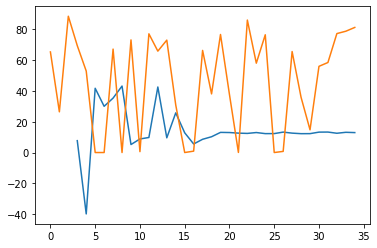

In [118]:
plt.plot(predictions)
plt.plot(df_working_hours_test["y"])

In [121]:
np.sqrt(np.mean(predictions - df_working_hours_test["y"])**2)

29.86811141130462

In [66]:
df_working_hours_test.set_index('Timestamp', inplace=True)

In [72]:
res.predict(start = df_working_hours_test.index[0], 
            end = df_working_hours_test.index[len(df_working_hours_test) - 1])


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'